# **Day10**: *Pipe Maze*

## Part 1

You use the hang glider to ride the hot air from Desert Island all the way up to the floating metal island. This island is surprisingly cold and there definitely aren't any thermals to glide on, so you leave your hang glider behind.

You wander around for a while, but you don't find any people or animals. However, you do occasionally find signposts labeled "Hot Springs" pointing in a seemingly consistent direction; maybe you can find someone at the hot springs and ask them where the desert-machine parts are made.

The landscape here is alien; even the flowers and trees are made of metal. As you stop to admire some metal grass, you notice something metallic scurry away in your peripheral vision and jump into a big pipe! It didn't look like any animal you've ever seen; if you want a better look, you'll need to get ahead of it.

Scanning the area, you discover that the entire field you're standing on is densely packed with pipes; it was hard to tell at first because they're the same metallic silver color as the "ground". You make a quick sketch of all of the surface pipes you can see (your puzzle input).

The pipes are arranged in a two-dimensional grid of tiles:

- | is a vertical pipe connecting north and south.
- &#8209; is a horizontal pipe connecting east and west.
- L is a 90-degree bend connecting north and east.
- J is a 90-degree bend connecting north and west.
- 7 is a 90-degree bend connecting south and west.
- F is a 90-degree bend connecting south and east.
- . is ground; there is no pipe in this tile.
- S is the starting position of the animal; there is a pipe on this tile, but your sketch doesn't show what shape the pipe has.


Based on the acoustics of the animal's scurrying, you're confident the pipe that contains the animal is one large, continuous loop.

For example, here is a square loop of pipe:

```
.....
.F-7.
.|.|.
.L-J.
.....
```

If the animal had entered this loop in the northwest corner, the sketch would instead look like this:

```
.....
.S-7.
.|.|.
.L-J.
.....
```

In the above diagram, the S tile is still a 90-degree F bend: you can tell because of how the adjacent pipes connect to it.

Unfortunately, there are also many pipes that aren't connected to the loop! This sketch shows the same loop as above:

```
-L|F7
7S-7|
L|7||
-L-J|
L|-JF
```

In the above diagram, you can still figure out which pipes form the main loop: they're the ones connected to S, pipes those pipes connect to, pipes those pipes connect to, and so on. Every pipe in the main loop connects to its two neighbors (including S, which will have exactly two pipes connecting to it, and which is assumed to connect back to those two pipes).

Here is a sketch that contains a slightly more complex main loop:

```
..F7.
.FJ|.
SJ.L7
|F--J
LJ...
```

Here's the same example sketch with the extra, non-main-loop pipe tiles also shown:

```
7-F7-
.FJ|7
SJLL7
|F--J
LJ.LJ
```

If you want to get out ahead of the animal, you should find the tile in the loop that is farthest from the starting position. Because the animal is in the pipe, it doesn't make sense to measure this by direct distance. Instead, you need to find the tile that would take the longest number of steps along the loop to reach from the starting point - regardless of which way around the loop the animal went.

In the first example with the square loop:

```
.....
.S-7.
.|.|.
.L-J.
.....
```

You can count the distance each tile in the loop is from the starting point like this:

```
.....
.012.
.1.3.
.234.
.....
```

In this example, the farthest point from the start is 4 steps away.

Here's the more complex loop again:

```
..F7.
.FJ|.
SJ.L7
|F--J
LJ...
```

Here are the distances for each tile on that loop:

```
..45.
.236.
01.78
14567
23...
```

Find the single giant loop starting at S. How many steps along the loop does it take to get from the starting position to the point farthest from the starting position?

### Solution

In [1]:
pipes_direction_map = {'|': 'NS','-': 'EW','F': 'SE','J': 'NW','L': 'NE','7': 'SW'}
move_map = {'N': (-1, 0), 'E': (0, 1), 'S': (1, 0), 'W': (0, -1)}
inverse_map = {'N': 'S', 'E': 'W', 'S': 'N', 'W': 'E'}


def get_next_step_data(position, origin_direction, lines):
    row, col = position

    pipe_direction = pipes_direction_map[lines[row][col]]
    destination_direction = pipe_direction.replace(origin_direction, '')
    next_origin_direction = inverse_map[destination_direction]
    
    delta = move_map[destination_direction]
    next_position = (row+delta[0], col+delta[1])

    return next_position, next_origin_direction


def follow_pipe(first_step, lines):
    position, origin_direction = first_step
    
    counter = 1
    while True:
        if lines[position[0]][position[1]] == 'S':
            return counter

        position, origin_direction = get_next_step_data(position, origin_direction, lines)
        counter += 1

In [2]:
def find_starting_position(lines):
    position = None
    for row, line in enumerate(lines):
        col = line.find('S')
        if col != -1:
            position = (row, col)
    return position


def find_first_step(start_position, lines):
    row, col = start_position
    boundaries = {'N': 0, 'E':len(lines[0]), 'S': len(lines), 'W':0}
    
    directions = {
        'N': (row-1, col) if row-1 > boundaries['N'] else None,
        'E': (row, col+1) if col+1 < boundaries['E'] else None,
        'S': (row+1, col) if row+1 < boundaries['S'] else None,
        'W': (row, col-1) if col-1 > boundaries['W'] else None,
    }

    for direction, position in directions.items():
        symbol = lines[position[0]][position[1]] if position else '!'
        if symbol in pipes_direction_map.keys():
            origin_direction = inverse_map[direction]
            if origin_direction in pipes_direction_map[symbol]:
                return position, origin_direction
    

In [3]:
def find_number_of_steps(input_string):
    lines = input_string.splitlines()
    starting_position = find_starting_position(lines)
    first_step = find_first_step(starting_position, lines)
    
    total_number_of_steps = follow_pipe(first_step, lines)
    return int(total_number_of_steps/2)

### Example

In [4]:
input_string = """7-F7-
.FJ|7
SJLL7
|F--J
LJ.LJ"""


find_number_of_steps(input_string)


8

### Submission

In [5]:
with open('input/day10.txt', 'r') as file:
    input_string = file.read()

find_number_of_steps(input_string)


6649

## Part 2

textYou quickly reach the farthest point of the loop, but the animal never emerges. Maybe its nest is within the area enclosed by the loop?

To determine whether it's even worth taking the time to search for such a nest, you should calculate how many tiles are contained within the loop. For example:

```
...........
.S-------7.
.|F-----7|.
.||.....||.
.||.....||.
.|L-7.F-J|.
.|..|.|..|.
.L--J.L--J.
...........
```

The above loop encloses merely four tiles - the two pairs of . in the southwest and southeast (marked I below). The middle . tiles (marked O below) are not in the loop. Here is the same loop again with those regions marked:

```
...........
.S-------7.
.|F-----7|.
.||OOOOO||.
.||OOOOO||.
.|L-7OF-J|.
.|II|O|II|.
.L--JOL--J.
.....O.....
```

In fact, there doesn't even need to be a full tile path to the outside for tiles to count as outside the loop - squeezing between pipes is also allowed! Here, I is still within the loop and O is still outside the loop:

```
..........
.S------7.
.|F----7|.
.||OOOO||.
.||OOOO||.
.|L-7F-J|.
.|II||II|.
.L--JL--J.
..........
```

In both of the above examples, 4 tiles are enclosed by the loop.

Here's a larger example:

```
.F----7F7F7F7F-7....
.|F--7||||||||FJ....
.||.FJ||||||||L7....
FJL7L7LJLJ||LJ.L-7..
L--J.L7...LJS7F-7L7.
....F-J..F7FJ|L7L7L7
....L7.F7||L7|.L7L7|
.....|FJLJ|FJ|F7|.LJ
....FJL-7.||.||||...
....L---J.LJ.LJLJ...
```

The above sketch has many random bits of ground, some of which are in the loop (I) and some of which are outside it (O):

```
OF----7F7F7F7F-7OOOO
O|F--7||||||||FJOOOO
O||OFJ||||||||L7OOOO
FJL7L7LJLJ||LJIL-7OO
L--JOL7IIILJS7F-7L7O
OOOOF-JIIF7FJ|L7L7L7
OOOOL7IF7||L7|IL7L7|
OOOOO|FJLJ|FJ|F7|OLJ
OOOOFJL-7O||O||||OOO
OOOOL---JOLJOLJLJOOO
```

In this larger example, 8 tiles are enclosed by the loop.

Any tile that isn't part of the main loop can count as being enclosed by the loop. Here's another example with many bits of junk pipe lying around that aren't connected to the main loop at all:

```
FF7FSF7F7F7F7F7F---7
L|LJ||||||||||||F--J
FL-7LJLJ||||||LJL-77
F--JF--7||LJLJ7F7FJ-
L---JF-JLJ.||-FJLJJ7
|F|F-JF---7F7-L7L|7|
|FFJF7L7F-JF7|JL---7
7-L-JL7||F7|L7F-7F7|
L.L7LFJ|||||FJL7||LJ
L7JLJL-JLJLJL--JLJ.L
```

Here are just the tiles that are enclosed by the loop marked with I:

```
FF7FSF7F7F7F7F7F---7
L|LJ||||||||||||F--J
FL-7LJLJ||||||LJL-77
F--JF--7||LJLJIF7FJ-
L---JF-JLJIIIIFJLJJ7
|F|F-JF---7IIIL7L|7|
|FFJF7L7F-JF7IIL---7
7-L-JL7||F7|L7F-7F7|
L.L7LFJ|||||FJL7||LJ
L7JLJL-JLJLJL--JLJ.L
```

In this last example, 10 tiles are enclosed by the loop.

Figure out whether you have time to search for the nest by calculating the area within the loop. How many tiles are enclosed by the loop?

### Solution

In [6]:

def follow_pipe(first_step, lines):
    grid = [[0 for _ in lines[0]] for _ in lines]
    position, origin_direction = first_step
    
    vertices = []
    while True:
        symbol = lines[position[0]][position[1]]
        if symbol == 'S':
            break
        if symbol in ['L', 'J', '7', 'F']:
            vertices.append(position)
        
        grid[position[0]][position[1]] = 1
        position, origin_direction = get_next_step_data(position, origin_direction, lines)

    return vertices, grid

In [7]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon


def find_number_of_enclosed_cells(input_string):
    lines = input_string.splitlines()
    starting_position = find_starting_position(lines)
    first_step = find_first_step(starting_position, lines)
    
    vertices, grid = follow_pipe(first_step, lines)
    polygon = Polygon(vertices)
    
    counter = 0
    for row in range(len(grid)):
        # print(f"{row}/{len(grid)}")
        for col in range(len(grid[0])):
            point = Point(row, col)
            if polygon.contains(point):
                counter += 1

    plt.imshow(grid, cmap='binary', interpolation='none')
    plt.show()
    return counter

### Example

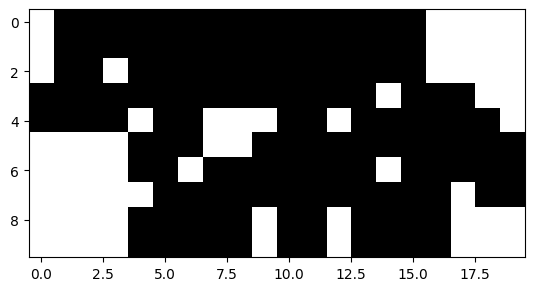

9

In [8]:
input_string = """.F----7F7F7F7F-7....
.|F--7||||||||FJ....
.||.FJ||||||||L7....
FJL7L7LJLJ||LJ.L-7..
L--J.L7...LJS7F-7L7.
....F-J..F7FJ|L7L7L7
....L7.F7||L7|.L7L7|
.....|FJLJ|FJ|F7|.LJ
....FJL-7.||.||||...
....L---J.LJ.LJLJ..."""


find_number_of_enclosed_cells(input_string)


### Submission

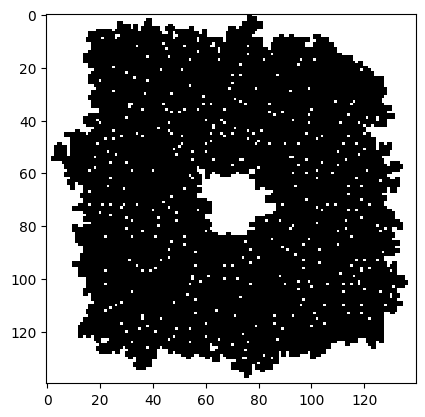

601

In [9]:
with open('input/day10.txt', 'r') as file:
    input_string = file.read()

find_number_of_enclosed_cells(input_string)
